In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,5)

# Load dataset
df = pd.read_csv("C:/Users/karan/Desktop/Healthcare Redamission Prediction/Data/Raw/diabetic_data.csv")
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 5)

# === Auto-save setup ===
CHART_DIR = "./Outputs/charts"   # folder relative to the notebook
os.makedirs(CHART_DIR, exist_ok=True)

plot_counter = 1  # will auto-increment if you don't pass a name

def save_fig(name: str | None = None):
    """
    Save current matplotlib figure to Outputs/charts.
    If name is None, auto-generates a numbered file name.
    """
    global plot_counter

    if name is None:
        name = f"plot_{plot_counter:02d}.png"
        plot_counter += 1

    path = os.path.join(CHART_DIR, name)
    plt.savefig(path, bbox_inches="tight")
    print("Saved figure to:", path)


In [5]:
df.info()
df.describe(include='all').T.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


In [6]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [7]:
df[numeric_cols].describe().T.to_csv("../Data/Processed/numerical_summary.csv")


OSError: Cannot save file into a non-existent directory: '..\Data\Processed'

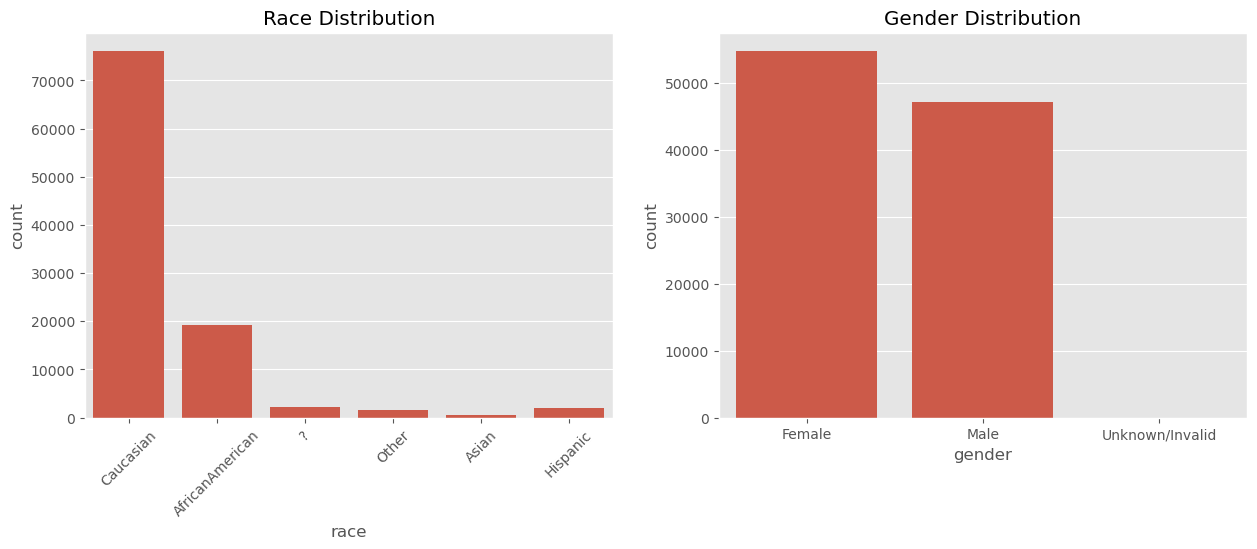

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(x='race', data=df, ax=axes[0])
axes[0].set_title("Race Distribution")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='gender', data=df, ax=axes[1])
axes[1].set_title("Gender Distribution")

plt.show()


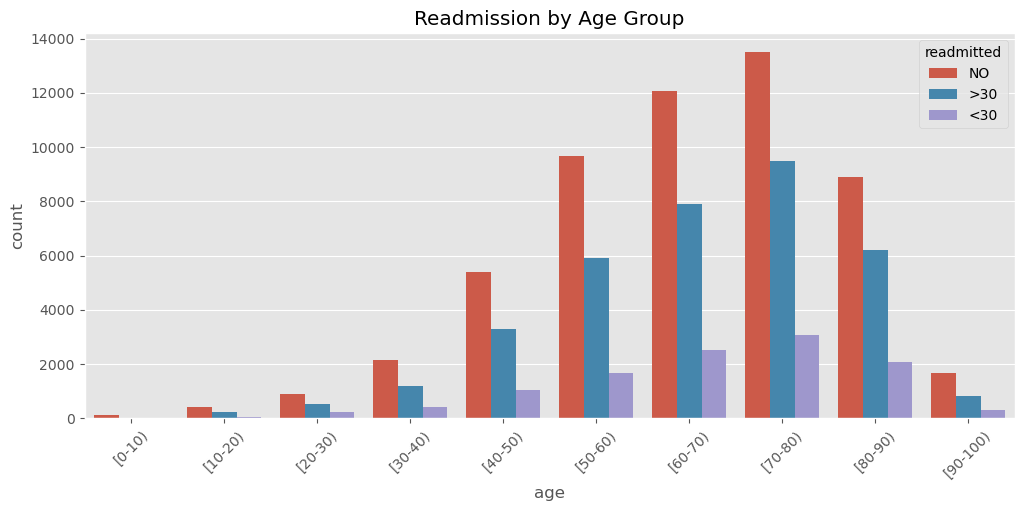

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='age', hue='readmitted', data=df)
plt.title("Readmission by Age Group")
plt.xticks(rotation=45)
plt.show()


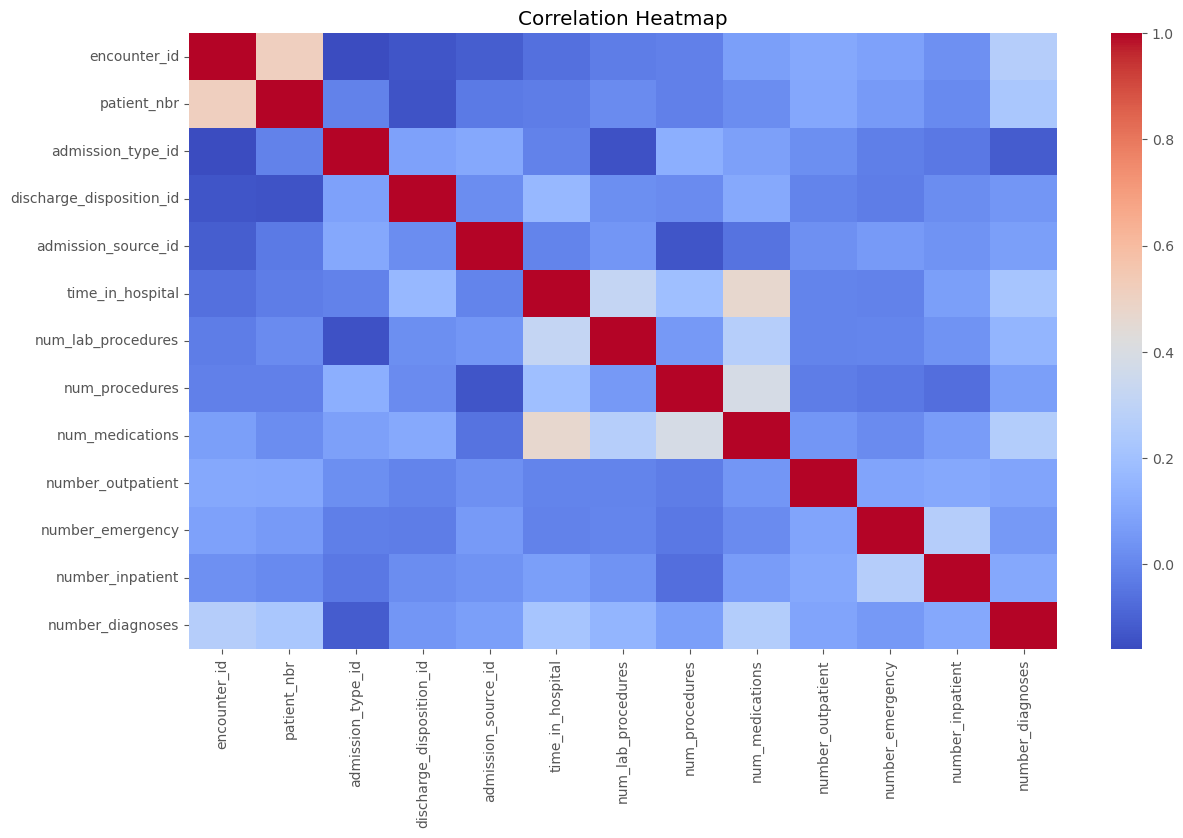

In [13]:
num_df = df[numeric_cols]

plt.figure(figsize=(14,8))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


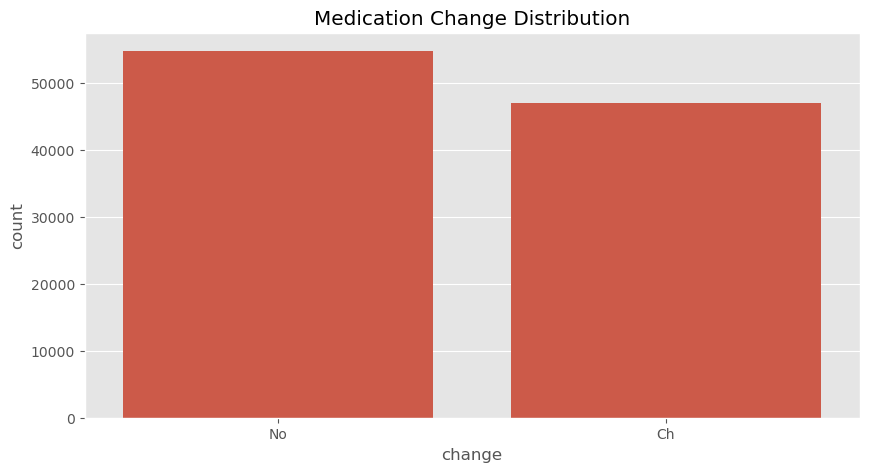

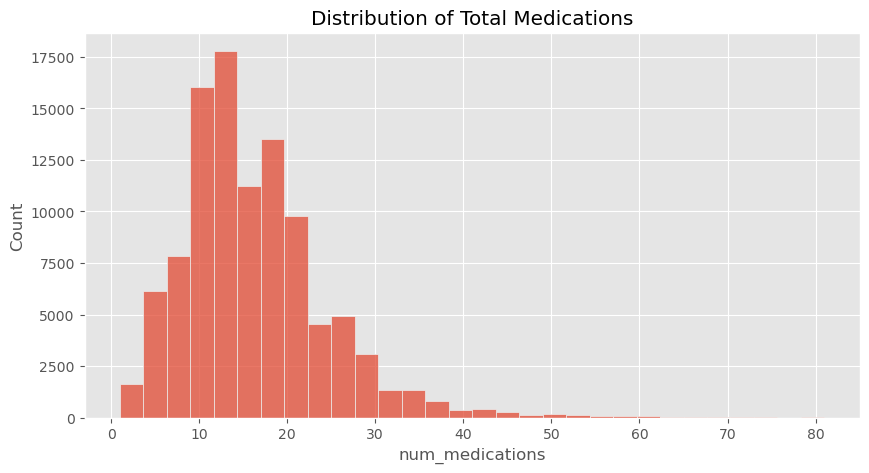

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x='change', data=df)
plt.title("Medication Change Distribution")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['num_medications'], bins=30)
plt.title("Distribution of Total Medications")
plt.show()


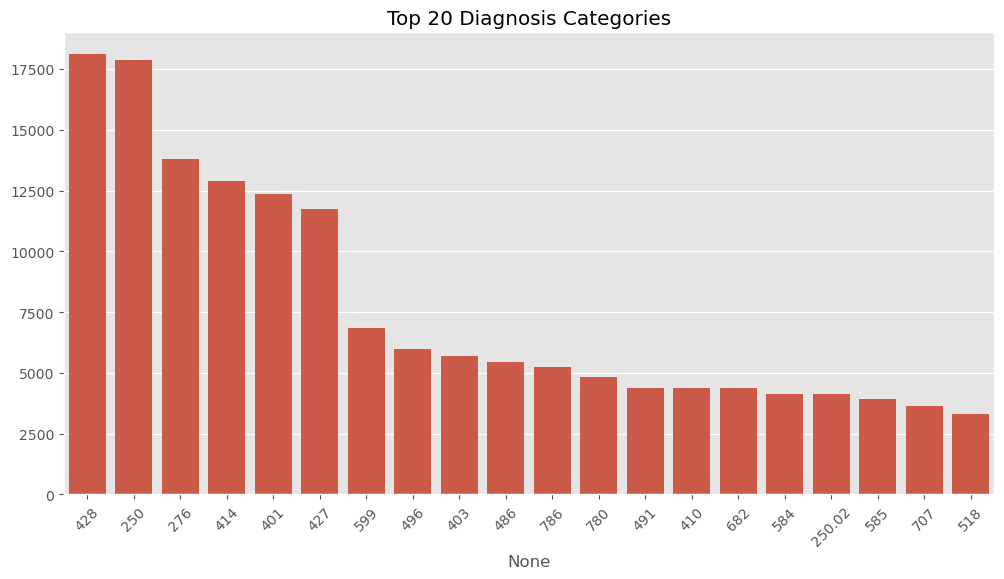

In [15]:
diag_cols = ['diag_1', 'diag_2', 'diag_3']

diagnoses = pd.concat([df[col] for col in diag_cols])
top20 = diagnoses.value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=top20.index, y=top20.values)
plt.title("Top 20 Diagnosis Categories")
plt.xticks(rotation=45)
plt.show()


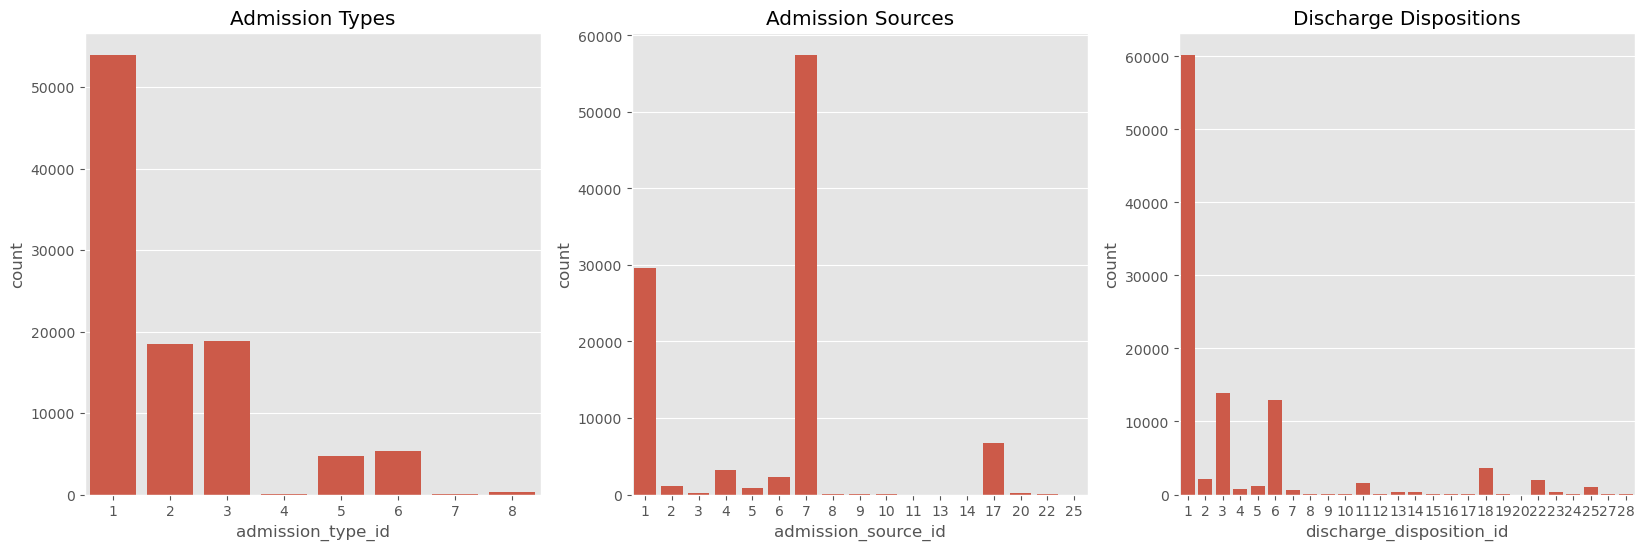

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

sns.countplot(x='admission_type_id', data=df, ax=axes[0])
axes[0].set_title("Admission Types")

sns.countplot(x='admission_source_id', data=df, ax=axes[1])
axes[1].set_title("Admission Sources")

sns.countplot(x='discharge_disposition_id', data=df, ax=axes[2])
axes[2].set_title("Discharge Dispositions")

plt.show()


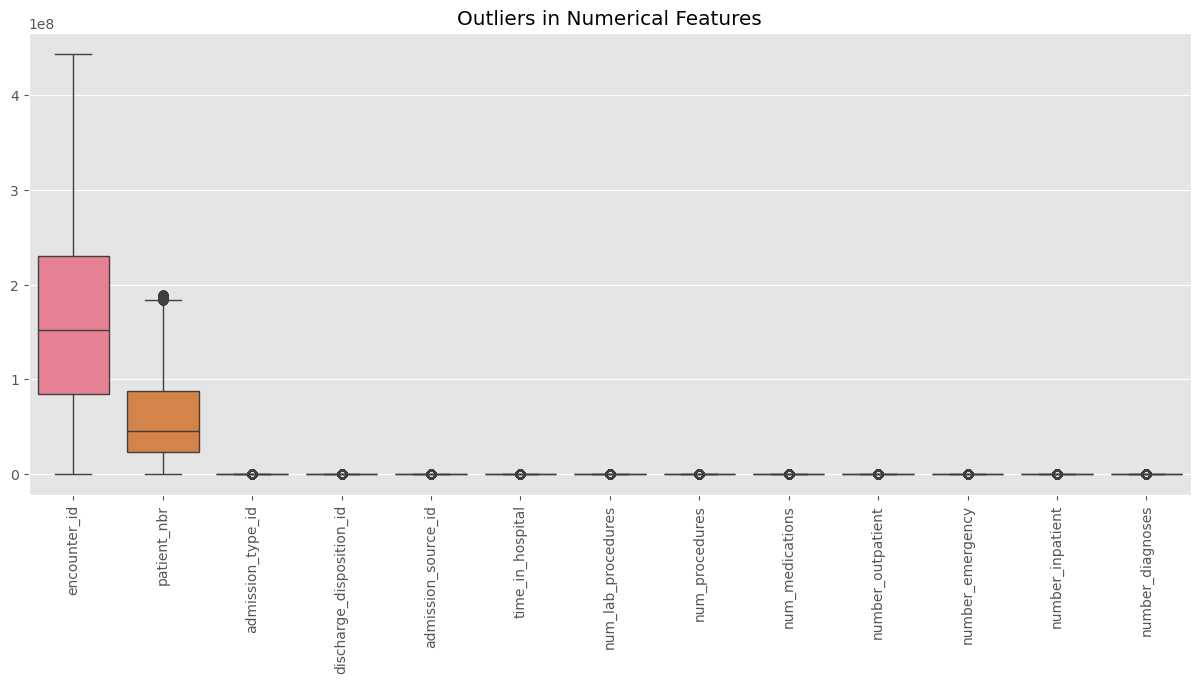

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(data=num_df)
plt.xticks(rotation=90)
plt.title("Outliers in Numerical Features")
plt.show()


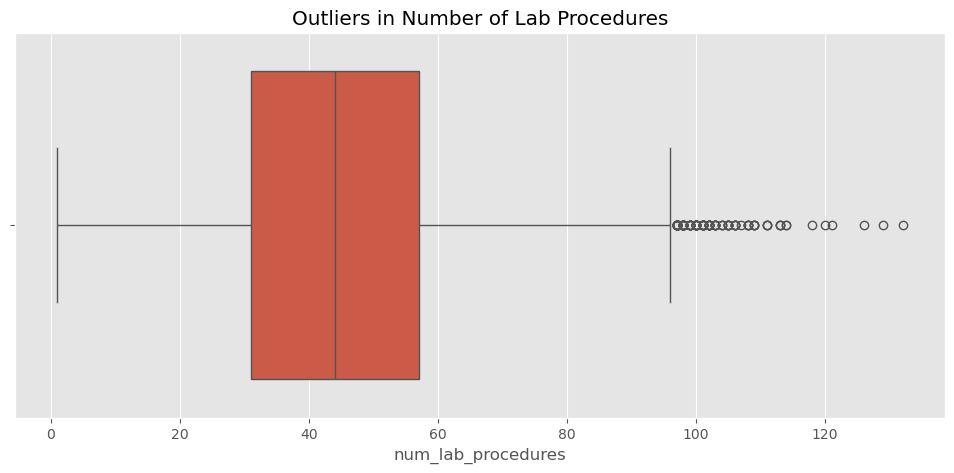

In [18]:
sns.boxplot(x=df['num_lab_procedures'])
plt.title("Outliers in Number of Lab Procedures")
plt.show()


📝 Exploratory Data Analysis (EDA) Report – Healthcare Readmission Prediction

Author: Karan Sharma

1. Numerical Summary

The dataset shows wide variation in lab procedures, medications, and diagnoses. Some features have extreme values, indicating potential outliers.

2. Demographics

Majority of patients fall under Caucasian and African American groups.

Gender distribution is fairly balanced.

3. Readmission Patterns

Older age groups (50–70) show higher readmission counts.

Readmissions within 30 days (<30) are far fewer than >30 readmissions.

4. Correlations

Number of medications and number of diagnoses have moderate positive correlation.

Time in hospital has weak correlation with most numeric features.

5. Medications

Most patients did not have a medication change.

Higher medication count may indicate greater severity of conditions.

6. Diagnoses

Diagnosis code frequency shows certain chronic conditions appear more often.

Top 20 diagnoses dominate majority of encounters.

7. Admission & Discharge Insights

Emergency admissions are significant.

Discharge dispositions reveal many patients go home, while some transition to other care facilities.

8. Outliers

Several numeric fields contain outliers (especially lab procedures & medications).

Outliers may represent complex or critical patient cases.

Conclusion

The EDA reveals strong patterns in patient demographics, medical activity, and readmission behavior. These insights can be used to build:

Readmission prediction models, and

Fraud detection flags (e.g., unusually high procedures or medications)

The findings support next steps in machine learning modeling or healthcare optimization.


In [20]:
plt.figure(figsize=(12, 5))
# ... your seaborn / matplotlib plotting code ...
save_fig("your_descriptive_name.png")
plt.show()


Saved figure to: ./Outputs/charts\your_descriptive_name.png


<Figure size 1200x500 with 0 Axes>

Saved figure to: ./Outputs/charts\race_distribution.png


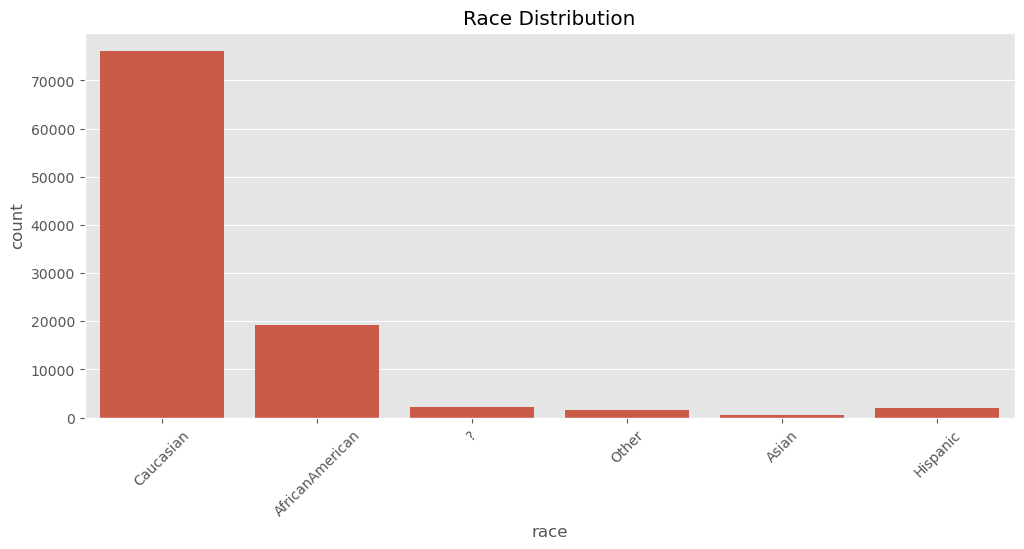

In [21]:
plt.figure(figsize=(12, 5))
sns.countplot(x="race", data=df)
plt.title("Race Distribution")
plt.xticks(rotation=45)

save_fig("race_distribution.png")
plt.show()


Saved figure to: ./Outputs/charts\gender_distribution.png


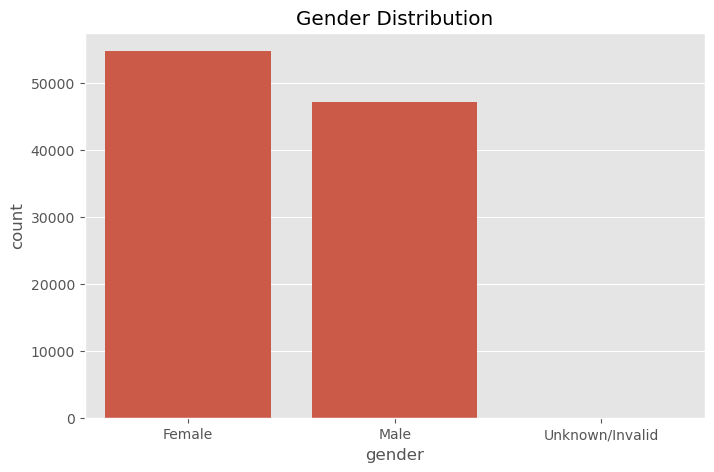

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", data=df)
plt.title("Gender Distribution")

save_fig("gender_distribution.png")
plt.show()


Saved figure to: ./Outputs/charts\readmission_by_age.png


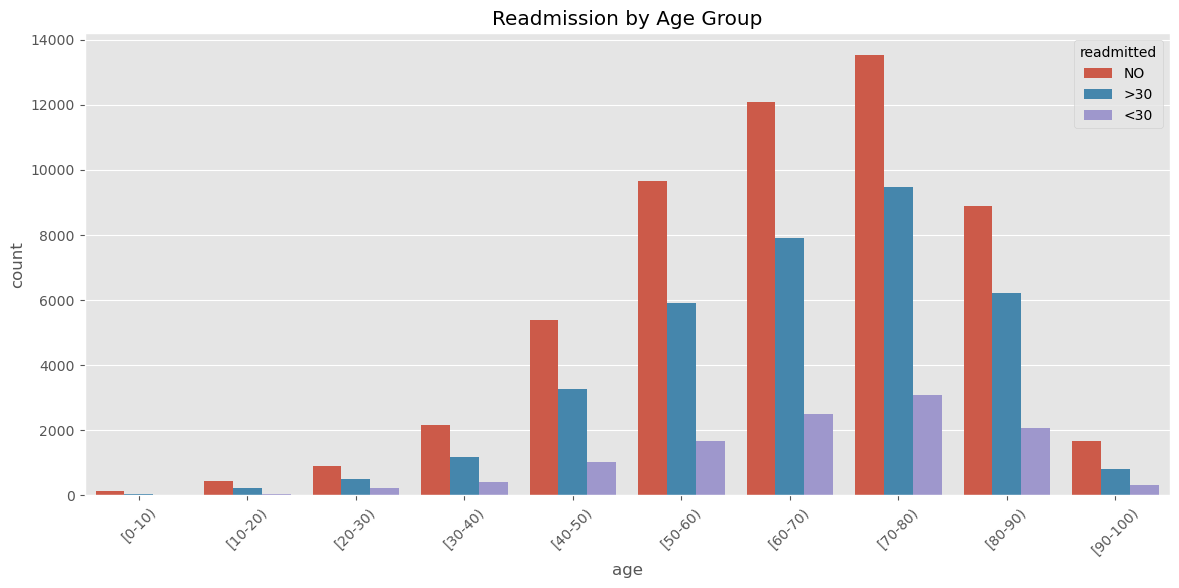

In [23]:
plt.figure(figsize=(14, 6))
sns.countplot(x="age", hue="readmitted", data=df)
plt.title("Readmission by Age Group")
plt.xticks(rotation=45)

save_fig("readmission_by_age.png")
plt.show()


Saved figure to: ./Outputs/charts\correlation_heatmap.png


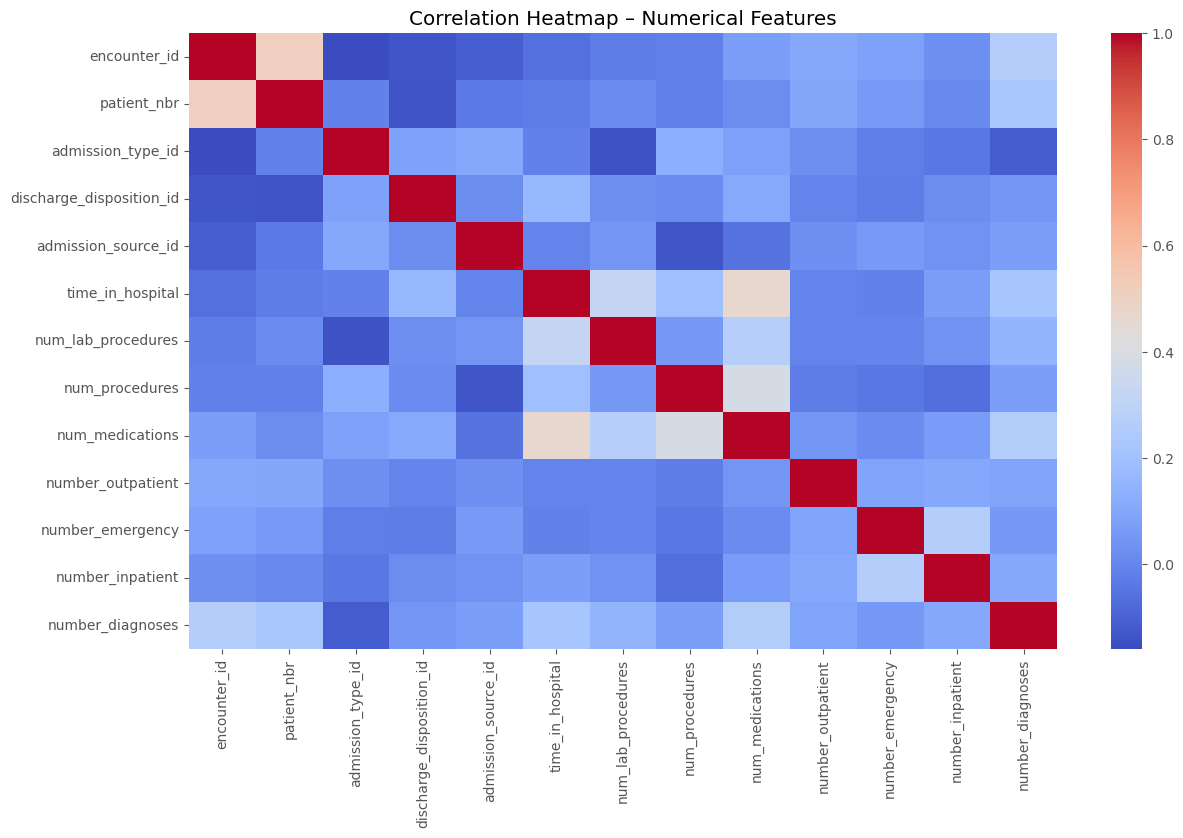

In [24]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap – Numerical Features")

save_fig("correlation_heatmap.png")
plt.show()


Saved figure to: ./Outputs/charts\medication_change_distribution.png


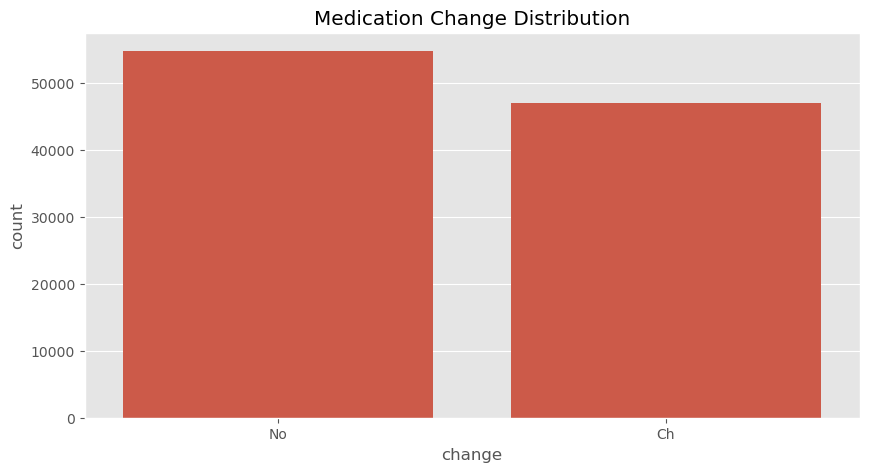

Saved figure to: ./Outputs/charts\num_medications_distribution.png


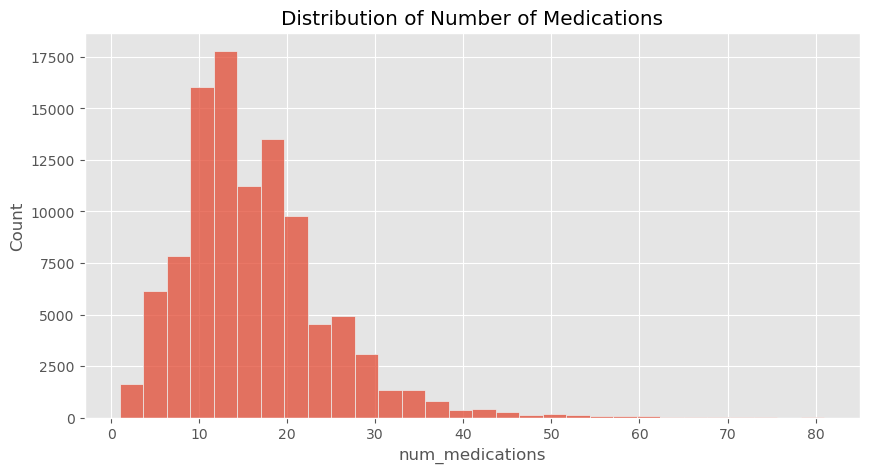

In [25]:
# Medication change
plt.figure(figsize=(10, 5))
sns.countplot(x="change", data=df)
plt.title("Medication Change Distribution")

save_fig("medication_change_distribution.png")
plt.show()

# Total medications
plt.figure(figsize=(10, 5))
sns.histplot(df["num_medications"], bins=30)
plt.title("Distribution of Number of Medications")

save_fig("num_medications_distribution.png")
plt.show()


Saved figure to: ./Outputs/charts\top20_diagnosis_codes.png


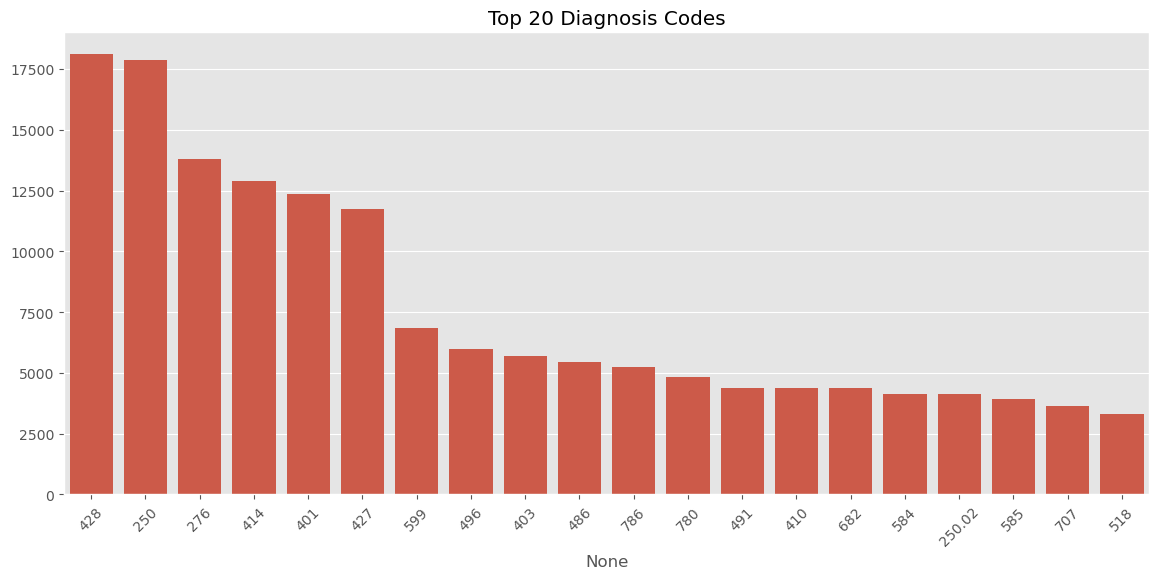

In [26]:
diag_cols = ["diag_1", "diag_2", "diag_3"]
diagnoses = pd.concat([df[col] for col in diag_cols])
top20 = diagnoses.value_counts().head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=top20.index, y=top20.values)
plt.title("Top 20 Diagnosis Codes")
plt.xticks(rotation=45)

save_fig("top20_diagnosis_codes.png")
plt.show()


Saved figure to: ./Outputs/charts\admission_source_discharge_distribution.png


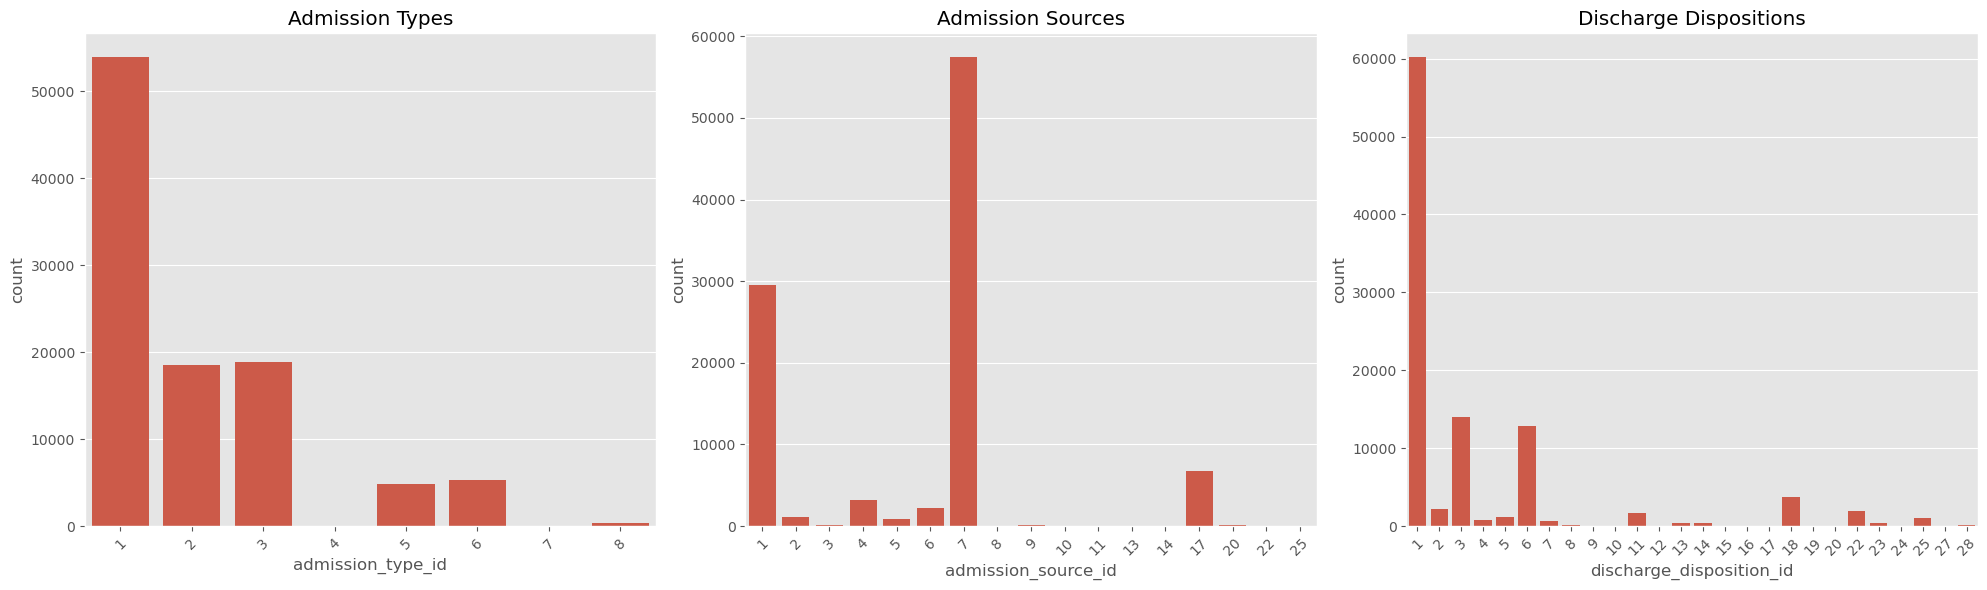

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(x="admission_type_id", data=df, ax=axes[0])
axes[0].set_title("Admission Types")
axes[0].tick_params(axis="x", rotation=45)

sns.countplot(x="admission_source_id", data=df, ax=axes[1])
axes[1].set_title("Admission Sources")
axes[1].tick_params(axis="x", rotation=45)

sns.countplot(x="discharge_disposition_id", data=df, ax=axes[2])
axes[2].set_title("Discharge Dispositions")
axes[2].tick_params(axis="x", rotation=45)

plt.tight_layout()

save_fig("admission_source_discharge_distribution.png")
plt.show()


Saved figure to: ./Outputs/charts\outliers_numerical_features.png


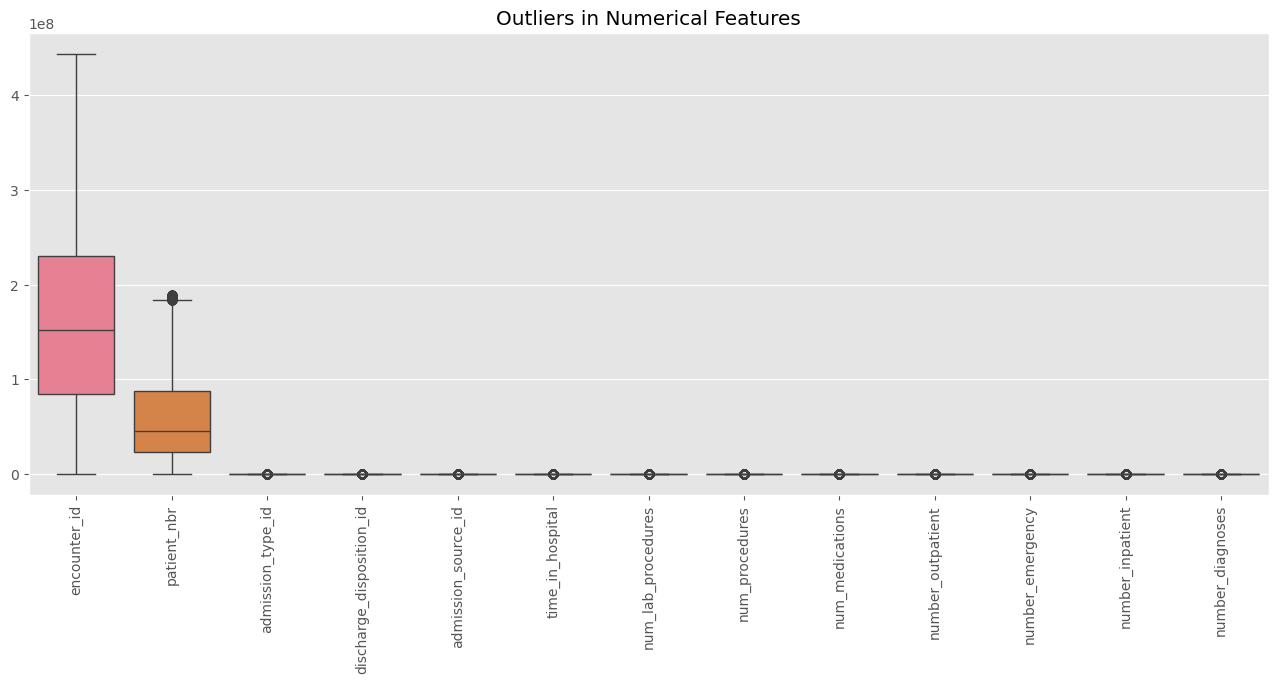

In [28]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outliers in Numerical Features")

save_fig("outliers_numerical_features.png")
plt.show()
